# 확률적 경사 하강법

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## SGDClassifier

In [2]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data') # pandas 로 csv 파일을 불러와서 fish에 저장

In [3]:
# .head를() 사용하여 지정한 수 만큼 데이터를 확인할 수 있다. 기본값은 5
fish.head(10)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
5,Bream,450.0,29.7,34.7,13.6024,4.9274
6,Bream,500.0,29.7,34.5,14.1795,5.2785
7,Bream,390.0,30.0,35.0,12.6700,4.6900
8,Bream,450.0,30.0,35.1,14.0049,4.8438
9,Bream,500.0,30.7,36.2,14.2266,4.9594


In [3]:
# 2차원 리스트 형태로 물고기 특성값을 fish_input에 저장한다. 특징을 2개 이상 가져올 경우 대괄호를 2개 붙여준다
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# to_numpy() 사용하여 numpy 배열 반환
fish_target = fish['Species'].to_numpy()

In [4]:
# sklearn 에서 train_test_split 임포트 적정 비율로 훈련셋과 target을 나눠준다. 자동으로 섞어줌
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [5]:
# StandardScaler임포트
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)  # 모델 학습 시키기
train_scaled = ss.transform(train_input) # . transform() 사용하여 데이터를 표준화 한다
test_scaled = ss.transform(test_input)  # 훈련 셋 테스트 셋 모두 변환해야 함

In [6]:
# SGDClassifier는 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 케이스
from sklearn.linear_model import SGDClassifier  

In [7]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42) # loss='log로 지정하여 로지스틱 손실 함수로 지정
sc.fit(train_scaled, train_target)                           # max_iter=10는 수행할 에포크 횟수를 10으로 지정                       
print(sc.score(train_scaled, train_target))  # 훈련세트와 테스트 세트 정확도 점수 출력
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
# ConvergenceWarning 경고가 나오므로 max_inter 매개변수 값을 늘려주도록 하겠다.

In [8]:
sc = SGDClassifier(loss='log', max_iter=50, random_state=42) 
sc.fit(train_scaled, train_target)                                                
print(sc.score(train_scaled, train_target))  
print(sc.score(test_scaled, test_target))

0.8319327731092437
0.775


In [ ]:
 # max_inter 매개변수 값을 50으로 늘려주었더니 ConvergenceWarning 경고가 사라짐

In [9]:
sc.partial_fit(train_scaled, train_target)  # SGDClassifier객체를 다시 만들지 않고 훈련한 모델 sc를 추가로 훈련하기
                                            # 위해서 partial_fit() 메서드를 사용
print(sc.score(train_scaled, train_target)) # 훈련세트와 테스트 세트 정확도 점수 확인
print(sc.score(test_scaled, test_target))

0.907563025210084
0.925


In [ ]:
# 에포크를 더 실행을 통해 정확도가 향상됨, 

## 에포크와 과대/과소적합

In [12]:
import numpy as np    

sc = SGDClassifier(loss='log', random_state=42)   

train_score = []         # 에포크마다 훈련세트와 테스트 세트에 대한 점수를  기록하기 위해 2개의 리스트 준비
test_score = []   
                                   
classes = np.unique(train_target)  # partial_fit 메서드만 사용하기 위해 np.unique 함수로 train_target에 있는 7개의 생선 목록을 만든다.

In [13]:
for _ in range(0, 300):       # 300번의 에포크 동안 훈련을 반복, '_'는 0에서 299까지 반복 횟수를 임시 저장하기 위한 용도로 사용
    sc.partial_fit(train_scaled, train_target, classes=classes) # partial_fit 메서드만 사용하기 위해 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit메서드에 전달해 주어야 한다.
    train_score.append(sc.score(train_scaled, train_target))  #반복마다 훈련 세트와 테스트 세트의 점수를 계산, train_score와  test_score 리스트에 추가 
    test_score.append(sc.score(test_scaled, test_target))

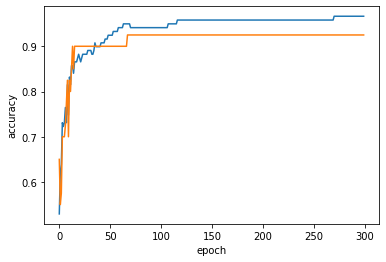

In [14]:
import matplotlib.pyplot as plt   #300번의 에포크 동안 기록한 훈련세트와 테스트 세트의 점수를 그래프로 나타냄

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# 에포크 초기에는 과소적합되어 훈련 세트와 테스트 정확도가 낮으나, 백 번째 에포크 이후에는 훈련세트 정확도는 증가하나 테스트 세트는 정체되어 모델이 과대적합 가능성이 있어 보이므로,
# 이 모델의 경우 백 번째 에포크가 적절한 반복횟수로 보인다.

In [15]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)  # 반복횟수를 100에 맞추고 모델을 다시 훈련
sc.fit(train_scaled, train_target)                                       # tol 메개변수를 None으로 지정하여 자동으로 멈추지 않고 100만큼 무조건 반복하도록 함. (tol:종료 조건을 지정하는 변수)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))    #최종적으로 훈련 세트와 테스트 세트에서 점수 출력

0.957983193277311
0.925


In [16]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42) # loss 매게변수의 기본값은 hinge
sc.fit(train_scaled, train_target)                      # 힌지 손실은 서포트 벡터머신이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실함수
                                                        # SGDClassifier는 여러 정류의 손실 함수를 loss 매개변수에 지정하여 다양한 머신러닝 알고리즘을 지원
print(sc.score(train_scaled, train_target))            
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
